In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

!pip install catboost



from catboost import CatBoostClassifier
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.6 MB/s eta 0:00:00


In [3]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print(f'train_df len: {len(train_df)}')
print(f'train_df shape: {train_df.shape}')
print(f'test_df len: {len(test_df)}')
print(f'test_df shape: {test_df.shape}')

train_df len: 891
train_df shape: (891, 12)
test_df len: 418
test_df shape: (418, 11)


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


# **Single Variable Data Analysis**

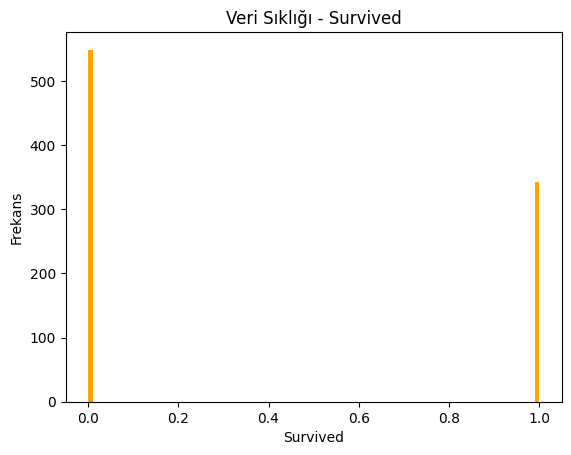

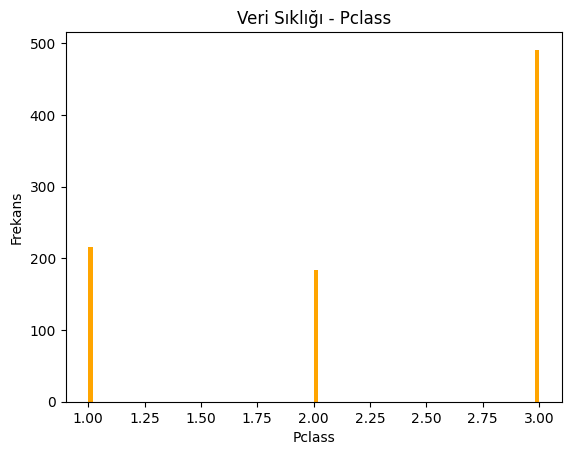

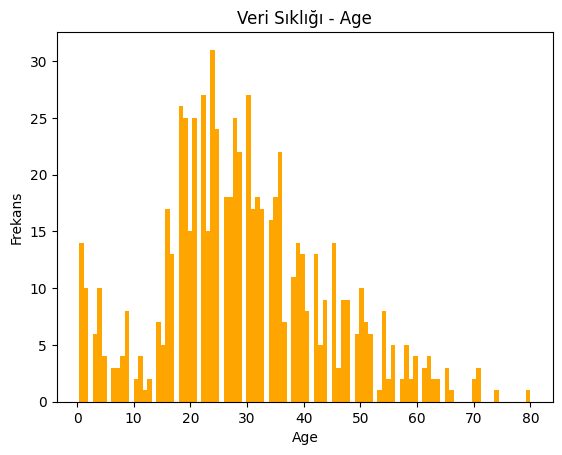

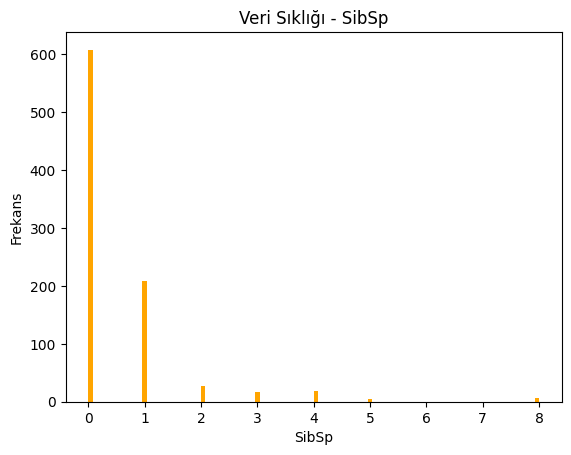

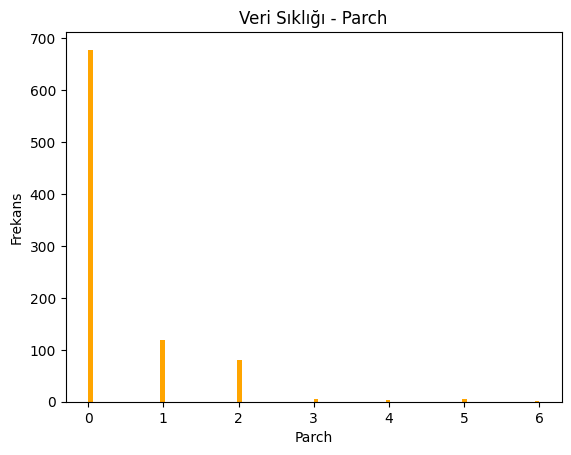

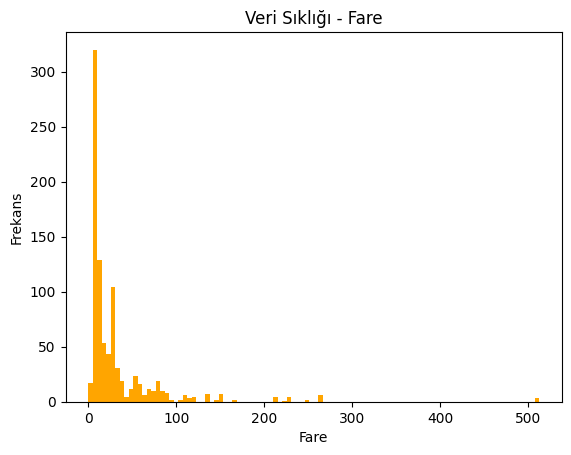

,Survived,Age,Fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [11]:
def PlotHistogram(data, variable):

    plt.figure()
    plt.hist(data[variable], bins=100, color="orange")
    plt.xlabel(variable)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}" .format(variable))
    plt.show()

numerical_variables = train_df.select_dtypes(include=['int64', 'float64']).columns[1:]


for i in numerical_variables:
    PlotHistogram(train_df, i)

survived_statistical_attributes = train_df["Survived"].describe()
age_statistical_attributes = train_df["Age"].describe()
fare_statistical_attributes = train_df["Fare"].describe()
data_statistical_attributes = pd.concat([survived_statistical_attributes,age_statistical_attributes, fare_statistical_attributes], axis=1)
data_statistical_attributes

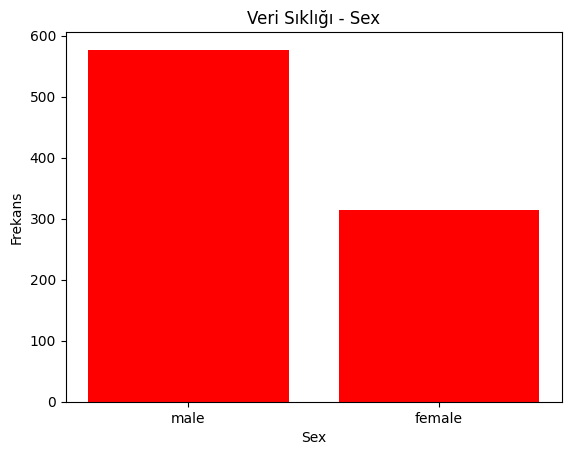

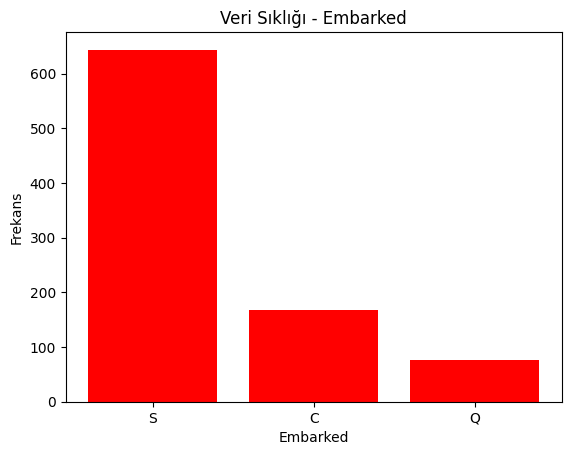

In [12]:
def PlotBar(data, variable, n=5):

    data_ = data[variable]
    data_counts = data_.value_counts()
    data_counts = data_counts[:n]

    plt.figure()
    plt.bar(data_counts.index, data_counts, color="red")
    plt.xlabel(variable)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}" .format(variable))
    plt.show()

categorical_variables = train_df[['Sex', 'Embarked']].columns.tolist()



for i in categorical_variables:
    PlotBar(train_df, i)

# **Multivariable Data Analysis**

In [13]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

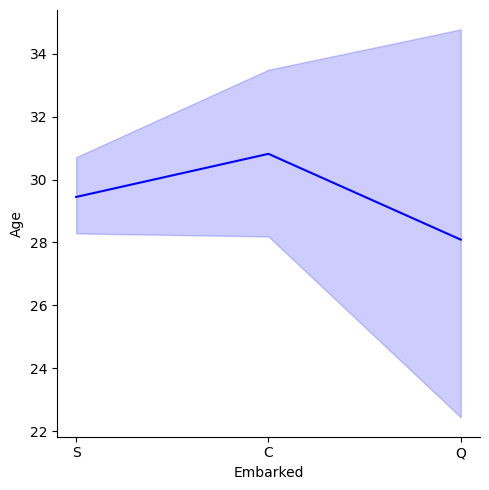

In [14]:
sns.relplot(x='Embarked', y='Age', kind='line', color='blue', data=train_df)

<Axes: xlabel='Age', ylabel='Fare'>

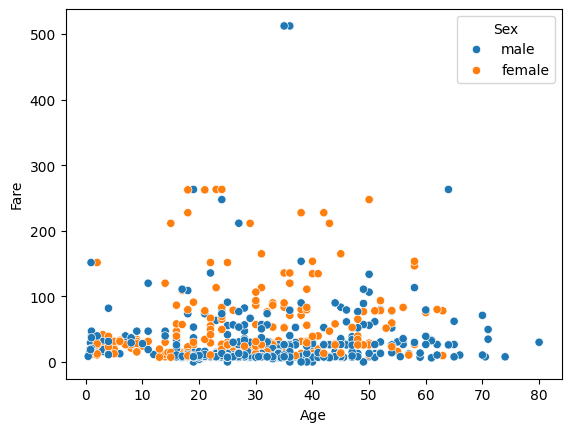

In [15]:
sns.scatterplot(x='Age', y='Fare', hue='Sex', data=train_df)

<Axes: xlabel='Age', ylabel='Fare'>

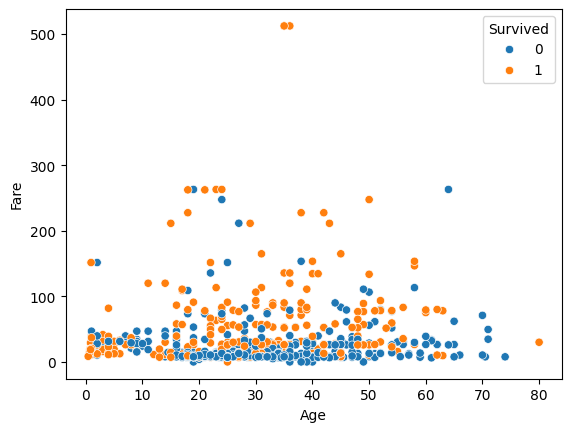

In [16]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df)

# **Data Preprocessing**

In [17]:
# One-hot encoding
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], prefix=['Sex', 'Embarked'])
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], prefix=['Sex', 'Embarked'])

# Missing values
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)
train_df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
test_df.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

<ipython-input-17-7a618c846f82>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
<ipython-input-17-7a618c846f82>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [18]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    bool   
 7   Sex_male    891 non-null    bool   
 8   Embarked_C  891 non-null    bool   
 9   Embarked_Q  891 non-null    bool   
 10  Embarked_S  891 non-null    bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 46.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 no

In [19]:
one_hot_cols = [col for col in train_df.columns if 'Embarked' in col or 'Sex' in col] # from true-false to 0-1 converting
train_df[one_hot_cols] = train_df[one_hot_cols].astype(int)
test_df[one_hot_cols] = test_df[one_hot_cols].astype(int)

In [20]:
scale_col = ['Age', 'Fare']
scaler = StandardScaler()
train_df[scale_col] = scaler.fit_transform(train_df[scale_col])
test_df[scale_col] = scaler.fit_transform(test_df[scale_col])

In [21]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64
PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [22]:
train_df.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,-0.592481,1,0,-0.502445,0,1,0,0,1
1,1,1,0.638789,1,0,0.786845,1,0,1,0,0
2,1,3,-0.284663,0,0,-0.488854,1,0,0,0,1


In [23]:
test_df.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0.334993,0,0,-0.498407,0,1,0,1,0
1,893,3,1.325530,1,0,-0.513274,1,0,0,0,1
2,894,2,2.514175,0,0,-0.465088,0,1,0,1,0


In [24]:
# Train-test split
x_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
x_test  = test_df.drop("PassengerId", axis=1).copy()
x_train.shape, y_train.shape, x_test.shape

((891, 10), (891,), (418, 10))

# **Traditional Machine Learning Algorithms¶**


**Logistic Regression¶**

In [25]:
log = LogisticRegression()
log_model = log.fit(x_train, y_train)
log_model

LogisticRegression()

In [26]:
y_pred = log_model.predict(x_test)
acc_log = round(log_model.score(x_train, y_train) * 100, 2)
acc_log

80.13

**Logistic Regression Model Tuning**

In [27]:
log_parameters = {'penalty' : ['l1', 'l2', 'elasticnet'],
                  'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                  'multi_class' : ['auto', 'ovr', 'multinominal']}
log = LogisticRegression()
log_cv = GridSearchCV(log, log_parameters, cv=10)
log_cv.fit(x_train, y_train) # optimized model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinominal'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [28]:
log_cv.best_params_

{'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}

In [29]:
log = LogisticRegression(multi_class = 'auto',
                         penalty = 'l2',
                         solver = 'liblinear')
log_tuned_model = log.fit(x_train, y_train) # optimized model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [30]:
y_pred = log_tuned_model.predict(x_test)
acc_log_tuned = round(log_model.score(x_train, y_train) * 100, 2)
acc_log_tuned

80.13

**Naive Bayes**

In [31]:
nb = BernoulliNB()
nb_model = nb.fit(x_train, y_train)
nb_model

BernoulliNB()

In [32]:
y_pred = nb_model.predict(x_test)
acc_nb = round(nb_model.score(x_train, y_train) * 100, 2)
acc_nb

78.23

**SVM**

In [33]:
svm = SVC()
svm_model = svm.fit(x_train, y_train)
svm_model

SVC()

In [34]:
y_pred = svm_model.predict(x_test)
acc_svm = round(svm_model.score(x_train, y_train) * 100, 2)
acc_svm

83.28

**KNN**

In [35]:
knn = KNeighborsClassifier()
knn_model = knn.fit(x_train, y_train)
knn_model

KNeighborsClassifier()

In [36]:
y_pred = knn_model.predict(x_test)
acc_knn = round(knn_model.score(x_train, y_train) * 100, 2)
acc_knn

85.86

**CART**

In [37]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(x_train, y_train)
cart_model

DecisionTreeClassifier()

In [38]:
y_pred = cart_model.predict(x_test)
acc_cart = round(cart_model.score(x_train, y_train) * 100, 2)
acc_cart

98.2

# **Ensemble Learning Methods**

**Random Forests**

In [40]:
rf = RandomForestClassifier()
rf_model = rf.fit(x_train, y_train)
rf_model

RandomForestClassifier()

In [41]:
y_pred = rf_model.predict(x_test)
acc_rf = round(rf_model.score(x_train, y_train) * 100, 2)
acc_rf

98.2

Text(0.5, 0, 'Variable Importance Levels')

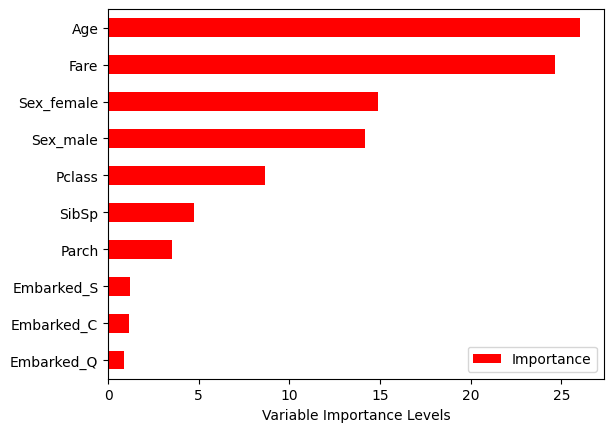

In [42]:
Importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                          index = x_train.columns)
Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Variable Importance Levels")

**Gradient Boosting Machine(GBM)¶**

In [43]:
gbm = GradientBoostingClassifier()
gbm_model = gbm.fit(x_train, y_train)
gbm_model

GradientBoostingClassifier()

In [44]:
y_pred = gbm_model.predict(x_test)
acc_gbm = round(gbm_model.score(x_train, y_train) * 100, 2)
acc_gbm

90.12

**XGBoost**

In [45]:
xgbm = XGBClassifier()
xgbm_model = xgbm.fit(x_train, y_train)
xgbm_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [46]:
y_pred = xgbm_model.predict(x_test)
acc_xgbm = round(xgbm_model.score(x_train, y_train) * 100, 2)
acc_xgbm

96.52

**XGBoost Model Tuning**

In [47]:
xgbm_params = {'n_estimators': [100, 500, 1000],
               'subsample': [0.6, 0.8, 1.0],
               'max_depth': [3, 4, 5,6],
               'learning_rate': [0.1,0.01,0.02,0.05],
               'min_samples_split': [2,5,8]}
xgbm_cv = GridSearchCV(xgbm, xgbm_params,
                       cv = 10,
                       n_jobs = -1,
                       verbose = 2)
xgbm_cv.fit(x_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:22:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [48]:
xgbm_cv.best_params_

{'learning_rate': 0.02,
 'max_depth': 6,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.8}

In [49]:
xgbm_tuned = XGBClassifier(learning_rate = 0.05,
                           max_depth = 6,
                           min_samples_split = 2,
                           n_estimators = 100,
                           subsample = 0.8)
xgbm_tuned_model = xgbm_tuned.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:40:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


In [50]:
y_pred = xgbm_tuned_model.predict(x_test)
acc_xgbm_tuned = round(xgbm_tuned_model.score(x_train, y_train) * 100, 2)
acc_xgbm_tuned

90.24

# **ALL MODEL COMPARISON**

In [51]:
models = [
    log_model,
    log_tuned_model,
    nb_model,
    svm_model,
    knn_model,
    cart_model,
    rf_model,
    gbm_model,
    xgbm_model,
    xgbm_tuned_model,
]





for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(x_test)
    acc = round(model.score(x_train, y_train), 4)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.2f}%".format(acc * 100))

----------------------------
LogisticRegression:
Accuracy: 80.13%
----------------------------
LogisticRegression:
Accuracy: 80.13%
----------------------------
BernoulliNB:
Accuracy: 78.23%
----------------------------
SVC:
Accuracy: 83.28%
----------------------------
KNeighborsClassifier:
Accuracy: 85.86%
----------------------------
DecisionTreeClassifier:
Accuracy: 98.20%
----------------------------
RandomForestClassifier:
Accuracy: 98.20%
----------------------------
GradientBoostingClassifier:
Accuracy: 90.12%
----------------------------
XGBClassifier:
Accuracy: 96.52%
----------------------------
XGBClassifier:
Accuracy: 90.24%


<ipython-input-52-5a67c6f0b2f1>:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)  # append yerine pd.concat kullanıldı


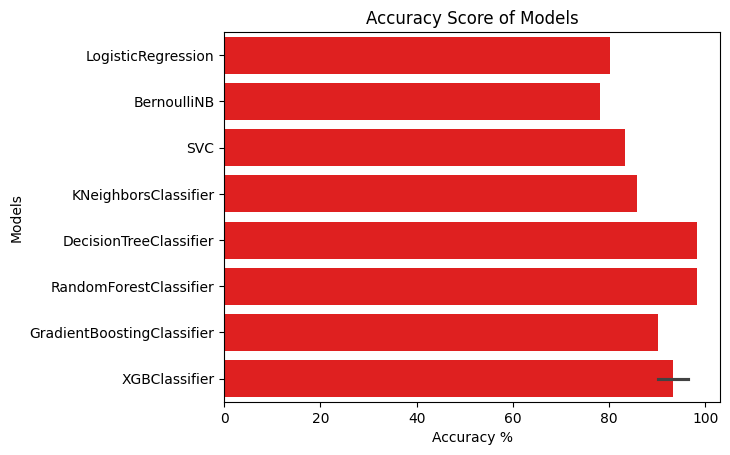

In [52]:
result = []
results = pd.DataFrame(columns=["Models", "Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(x_test)
    acc = round(model.score(x_train, y_train), 4)
    result = pd.DataFrame([[names, acc * 100]], columns=["Models", "Accuracy"])
    results = pd.concat([results, result], ignore_index=True)  # append yerine pd.concat kullanıldı

sns.barplot(x='Accuracy', y='Models', data=results, color="r")
plt.xlabel('Accuracy %')
plt.title('Accuracy Score of Models')
plt.show()

**As a result, we can use random forests and decision tree classifier while creating the submission file because we achieved accuracy of 98.2%**

In [55]:
y_pred_rf = rf_model.predict(x_test)
y_pred_cart = cart_model.predict(x_test)

In [56]:
import os
import pandas as pd

# Assuming `y_pred_rf` and `test_df` are already defined

# Predictions from models
# y_pred_rf = rf_model.predict(x_test)  # Random Forest predictions
# y_pred_cart = cart_model.predict(x_test)  # CART model predictions

# Specify output directory
output_dir = '/content/output'  # Default Colab directory
os.makedirs(output_dir, exist_ok=True)

# Create a submission DataFrame
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],  # Ensure `test_df` is defined earlier
    "Survived": y_pred_rf  # Using Random Forest predictions
})

# Save submission file to output directory
submission_file_path = os.path.join(output_dir, 'submission.csv')
submission.to_csv(submission_file_path, index=False)

print(f"Submission file saved at: {submission_file_path}")


Submission file saved at: /content/output/submission.csv


In [57]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the training and test datasets
train_df = pd.read_csv('/content/train.csv')  # Update the path
test_df = pd.read_csv('/content/test.csv')  # Update the path

# Feature engineering
def feature_engineering(df):
    # Extract titles from names
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don',
                                        'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

    # Family size
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

    # IsAlone
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

    # Fare bins
    df['FareBin'] = pd.qcut(df['Fare'], 4, labels=False)

    # Age bins
    df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 120], labels=False)

    # Cabin indicator
    df['HasCabin'] = df['Cabin'].notnull().astype(int)

    # Drop unnecessary columns
    df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

    return df

# Apply feature engineering
train_df = feature_engineering(train_df)
test_df = feature_engineering(test_df)

# Fill missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in ['Sex', 'Embarked', 'Title']:
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

# Prepare data for training
X = train_df.drop(['PassengerId', 'Survived'], axis=1)
y = train_df['Survived']
X_test = test_df.drop(['PassengerId'], axis=1)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Random Forest
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Evaluate on validation set
val_accuracy = best_rf.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Predictions
y_pred_rf = best_rf.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": y_pred_rf
})
submission.to_csv('/content/submission.csv', index=False)
print("Submission file created!")


<ipython-input-57-6d84456fe1f1>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
<ipython-input-57-6d84456fe1f1>:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END 

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [58]:
from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.01, max_depth=5, random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Evaluate on validation set
val_accuracy = xgb_model.score(X_val, y_val)
print(f"XGBoost Validation Accuracy: {val_accuracy:.4f}")

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": y_pred_xgb
})
submission.to_csv('/content/submission_xgb.csv', index=False)
print("XGBoost submission file created!")


XGBoost Validation Accuracy: 0.8380
XGBoost submission file created!


In [59]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

# Feature Engineering
def preprocess_data(df):
    # Fill missing values
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)

    # Family size and IsAlone
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

    # Extract title from Name
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don',
                                        'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

    # Convert categorical features to numerical
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
    df['Title'] = df['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4})

    # Drop unnecessary columns
    df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    return df

# Preprocess train and test datasets
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

# Split train data
X = train_df.drop(['Survived', 'PassengerId'], axis=1)
y = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1)
test_ids = test_df['PassengerId']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
print("Random Forest Validation Accuracy:", accuracy_score(y_val, y_pred_rf))

# XGBoost Model with Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBClassifier(random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_xgb_model = grid_search.best_estimator_

y_pred_xgb = best_xgb_model.predict(X_val)
print("XGBoost Validation Accuracy:", accuracy_score(y_val, y_pred_xgb))

# Logistic Regression Model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_val)
print("Logistic Regression Validation Accuracy:", accuracy_score(y_val, y_pred_lr))

# Ensemble Model (Stacking)
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', best_xgb_model),
        ('lr', lr_model)
    ],
    voting='soft'
)
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_val)
print("Ensemble Validation Accuracy:", accuracy_score(y_val, y_pred_ensemble))

# Final Prediction on Test Data
y_test_pred = ensemble_model.predict(X_test)

# Submission File
output_dir = '/content/output'
os.makedirs(output_dir, exist_ok=True)

submission = pd.DataFrame({
    "PassengerId": test_ids,
    "Survived": y_test_pred
})

submission_file_path = os.path.join(output_dir, 'submission_ensemble.csv')
submission.to_csv(submission_file_path, index=False)
print(f"Submission file saved at: {submission_file_path}")


<ipython-input-59-531db945b073>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-59-531db945b073>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Random Forest Validation Accuracy: 0.8324022346368715
XGBoost Validation Accuracy: 0.8212290502793296
Logistic Regression Validation Accuracy: 0.8100558659217877
Ensemble Validation Accuracy: 0.8100558659217877
Submission file saved at: /content/output/submission_ensemble.csv
